In [600]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [640]:
# Get Data from Excel file into DataFrame and filter data for speciic product groups and machine lines
file ='data.csv'
df = pd.read_csv(file)

df1 = df['product_group']=='Backer'
df2 = df[((df['line']=='SM1') | (df['line']=='SM2')| (df['line']=='SM3')) & (df['product_group']=='Batten')]
df3 = df['line']=='SM2'

#df=df[df1 & df2 ]
df2.head()

,id,number,started_at,manufactured_at,line,SMMainGroup,product_group,product_material,felt_speed,revs,...,cosmos_silica_error,feed_temperature,machine_cone_solids,mor,mor_filled,mor_in_spec,ilb,ilb_filled,ilb_in_spec,cosmos_fracture
0,387913,690349,11/30/2018 5:45,11/30/2018 6:15,SM2,2005557,Batten,"4/4\RusticBattensD15""",306.870,7,...,-0.4171,108.603,10.7119,NaN,12.223,1,NaN,1.8075,1,86
1,387914,690350,11/30/2018 5:45,11/30/2018 6:15,SM2,2005557,Batten,"4/4\RusticBattensD15""",306.870,7,...,-0.4171,108.603,10.7119,NaN,12.223,1,NaN,1.8075,1,86
6,387919,690351,11/30/2018 6:21,11/30/2018 7:03,SM2,2005557,Batten,"4/4\RusticBattensD15""",308.479,7,...,1.1971,108.903,10.5614,NaN,12.223,1,NaN,1.8075,1,86
7,387920,690352,11/30/2018 6:21,11/30/2018 7:03,SM2,2005557,Batten,"4/4\RusticBattensD15""",308.479,7,...,1.1971,108.903,10.5614,10.87,10.870,1,1.714,1.7140,1,54
608,388519,485979,12/2/2018 6:22,12/2/2018 7:00,SM1,2007431,Batten,5/16TexturedPlankB4,353.806,5,...,-0.6886,114.153,0.0000,NaN,7.103,1,NaN,1.1300,1,28


In [641]:

#Select few variables to begin with in your data frame
datat=df2[["cosmos_cement_sp","cosmos_silica_error", "felt_speed","feed_temperature",
          "cement_batch_setpoint","pulp_batch_error","tread_roll_pressure","pulp_batch_setpoint",
          "agipulper_percent_solids","sheets", "mor_filled"]]

# Delete NULL records
data=datat.dropna()

data.head()


,cosmos_cement_sp,cosmos_silica_error,felt_speed,feed_temperature,cement_batch_setpoint,pulp_batch_error,tread_roll_pressure,pulp_batch_setpoint,agipulper_percent_solids,sheets,mor_filled
0,370.0,-0.4171,306.870,108.603,882.0,0.4441,33.14300,6105.00,18.7212,42,12.223
1,370.0,-0.4171,306.870,108.603,882.0,0.4441,33.14300,6105.00,18.7212,42,12.223
6,370.0,1.1971,308.479,108.903,857.0,6.8926,33.12640,5911.33,22.6126,14,12.223
7,370.0,1.1971,308.479,108.903,857.0,6.8926,33.12640,5911.33,22.6126,14,10.870
608,370.0,-0.6886,353.806,114.153,568.0,42.2613,32.45765,3784.00,23.2679,72,7.103


In [642]:
# Separate Target value columns to make input variables ( feautures)

X = data.drop("mor_filled",axis=1)

# Keep Target value column as dependent variable y
y = data["mor_filled"]

print(X.shape, y.shape)

(232, 10) (232,)


In [643]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.972348636388173


In [644]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)
ic = model.intercept_
coef = len(model.coef_)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
print(f"Intercept : {ic}")
print(f"No of Coefficients : {coef}")

Mean Squared Error (MSE): 0.10948618116599414
R-squared (R2 ): 0.972348636388173
Intercept : -8.773120947201697
No of Coefficients : 10


In [645]:
features = pd.DataFrame(list(zip(X.columns, model.coef_)), columns =['features','estCoefficients'])
features.to_excel("coefficients.xlsx")

<function matplotlib.pyplot.show(*args, **kw)>

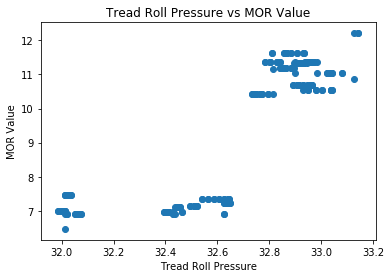

In [646]:
plt.scatter(data.tread_roll_pressure,data.mor_filled)
plt.xlabel("Tread Roll Pressure")
plt.ylabel("MOR Value")
plt.title("Tread Roll Pressure vs MOR Value")
plt.show

In [647]:
model.predict(X)[0:5]

array([10.91878253, 10.91878253, 11.09220883, 11.09220883,  7.09483736])

<function matplotlib.pyplot.show(*args, **kw)>

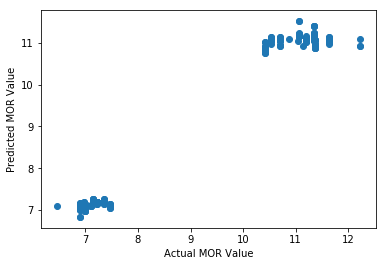

In [648]:
plt.scatter(data.mor_filled,model.predict(X))
plt.xlabel("Actual MOR Value")
plt.ylabel("Predicted MOR Value")
plt.show

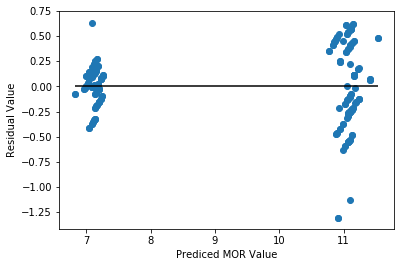

In [649]:
# Plot Residuals
predictions = model.predict(X)
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.xlabel("Prediced MOR Value")
plt.ylabel("Residual Value")
plt.show()

In [650]:
# Use of Test Train Split Models in Linear Regression

In [651]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.33, random_state =42)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(155, 10)
(155,)
(77, 10)
(77,)


In [652]:
model.fit(X_train,Y_train)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

# Score the prediction with mse and r2
mse1 = mean_squared_error(Y_train, predict_train)
r21 = r2_score(Y_train, predict_train)
ic1 = model.intercept_
coef1 = len(model.coef_)

print(f"Mean Squared Error (MSE): {mse1}")
print(f"R-squared (R2 ): {r21}")
print(f"Intercept : {ic1}")
print(f"No of Coefficients : {coef1}")

Mean Squared Error (MSE): 0.10729281013621203
R-squared (R2 ): 0.9733841757939826
Intercept : -9.093154562433584
No of Coefficients : 10


<function matplotlib.pyplot.show(*args, **kw)>

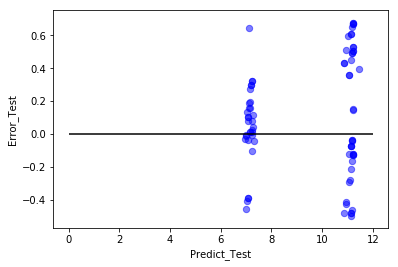

In [653]:
#plt.scatter(predict_train, predict_train - Y_train, c='b', s=40, alpha =.5)
plt.scatter(predict_test, predict_test - Y_test, c='b', s=40, alpha =0.5)
plt.xlabel("Predict_Test")
plt.ylabel("Error_Test")
plt.hlines(y=0, xmin =0, xmax =12)
plt.show

In [654]:
# Join the Predicted Value of MOR with the main data set and then write to Excel File

MOR_P = pd.DataFrame( {'MOR_Filled':Y_test,'MOR_Predicted':predict_test })
MOR_P
dataset = X_test.join(MOR_P)
dataset.head()
dataset.to_excel("Test.xlsx")
